In [1]:
import numpy as np
from astropy import cosmology 
from astropy import constants as const, units as u
from astropy.cosmology import Planck15 as P

from scipy import integrate
from scipy.integrate import quad, dblquad

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
plt.rcParams.update({
                    'font.size': 12,
                    'font.family': 'serif',
                    'axes.labelsize': 14,
                    'axes.titlesize': 15,
                    'xtick.labelsize': 12,
                    'ytick.labelsize': 12,
                    'xtick.direction': 'in',
                    'ytick.direction': 'in',
                    'xtick.top': True,
                    'ytick.right': True,
                    'lines.linewidth': 0.5,
                    'lines.markersize': 5,
                    'legend.fontsize': 14,
                    'legend.borderaxespad': 0,
                    'legend.frameon': True,
                    'legend.loc': 'lower right'})

colors1 = ['k', '#482677FF', '#238A8DDF', '#95D840FF']

# Figure 2

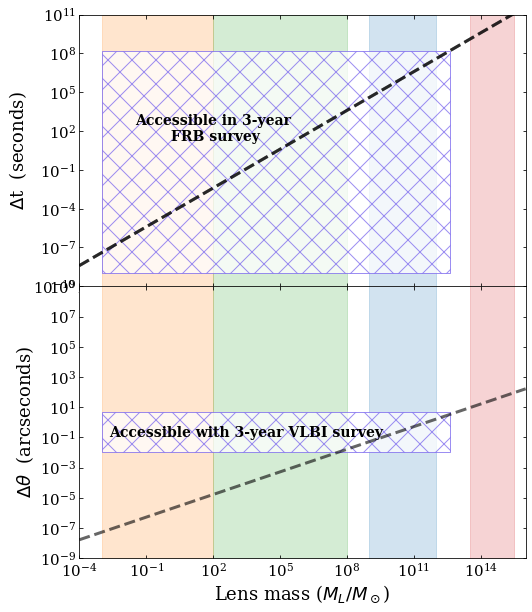

In [3]:
import numpy as np 
import matplotlib.pyplot as plt


def time_delay(M, z_l=1):
    return 1.97e-5 * (1+z_l) * M

def theta_einstein(M, z_l=1):
    return 1.63e-6 * M**0.5

def plot_time_theta():
    M = np.logspace(-4, 16, 1000)
    t_arr = time_delay(M)
    theta_arr = theta_einstein(M)

    fig = plt.figure(figsize=(8,10))
    ax = [plt.subplot(2,1,i+1) for i in range(2)]

    plt.subplots_adjust(wspace=0, hspace=0)
    Mmicro = np.logspace(-3, 2, 50)
    Mdmstruct = np.logspace(2,8,50)
    Mgal = np.logspace(9,12,50)
    Mclust = np.logspace(13.5, 15.5, 50)

    mm=0
    rot=0
    hal='center'
    val='center'
    ypos=1e3
    fs=18
    plt.subplot(212)
    plt.plot(M, theta_arr, '--', color='k', lw=3, alpha=0.6)
    plt.loglog()
    plt.ylim(1e-9, 1e9)
    plt.xlim(M.min(), M.max())
    plt.ylabel(r'$\Delta\theta$  (arcseconds)', fontsize=fs)
    plt.xlabel(r'Lens mass ($M_L/M_\odot$)', fontsize=fs)

    plt.subplot(211)
    plt.loglog()
    plt.ylim(1e-10, 1e11)
    plt.xlim(M.min(), M.max())
    plt.ylabel(r'$\Delta$t  (seconds)', fontsize=fs)
    plt.plot(M, t_arr, '--', color='k', lw=3, alpha=0.6)

    plt.savefig('./lensing_figure_%d.pdf' % mm);mm+=1

    plt.fill_between(Mmicro, 1e-13, 1e11, color='C1', alpha=0.2)
    plt.fill_between(Mdmstruct, 1e-13, 1e11, color='C2', alpha=0.2)
    plt.fill_between(Mgal, 1e-13, 1e11, color='C0', alpha=0.2)
    plt.fill_between(Mclust, 1e-13, 1e11, color='C3', alpha=0.2)
    plt.xticks(fontsize=0)
    plt.yticks(fontsize=15)
    
    plt.subplot(212)

    plt.fill_between(Mmicro, 1e-13, 1e11, color='C1', alpha=0.2)
    plt.fill_between(Mdmstruct, 1e-13, 1e11, color='C2', alpha=0.2)
    plt.fill_between(Mgal, 1e-13, 1e11, color='C0', alpha=0.2)
    plt.fill_between(Mclust, 1e-13, 1e11, color='C3', alpha=0.2)

    plt.savefig('./lensing_figure_%d.pdf' % mm);mm+=1

    plt.subplot(211)
    Mfrb = np.logspace(-3, 12+np.log10(3.94), 50)
    plt.fill_between(Mfrb, 1e-9, 1.5e8, alpha=0.75, hatch='x', edgecolor='mediumslateblue', 
        facecolor='white')
    plt.text(1e2, 150, 'Accessible in 3-year\n FRB survey', 
        color='k', fontsize=14, ha=hal, va=val, fontweight='bold')
    plt.plot(M, t_arr, '--', color='k', lw=3, alpha=0.6)

    plt.savefig('./lensing_figure_%d.pdf' % mm);mm+=1

    plt.subplot(212)
    Mfrb = np.logspace(-3, 12+np.log10(3.94), 50)
    plt.fill_between(Mfrb, 1e-2, 5, alpha=0.75, hatch='x', edgecolor='mediumslateblue', 
        facecolor='white')
    plt.text(3e3, 2e-1, 'Accessible with 3-year VLBI survey',
        color='k', fontsize=14, ha=hal, va=val, fontweight='bold')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.savefig('./lensing_figure_%d.pdf' % mm);mm+=1

plot_time_theta()

# Figure 3

In [4]:
from astropy import constants

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import astropy.constants as constants

from scipy.integrate import quad, dblquad
import pandas as pd

# Download CHIME/FRB Catalog 1
!wget https://storage.googleapis.com/chimefrb-dev.appspot.com/catalog1/chimefrbcat1.csv

# Read in catalog
datapd = pd.read_csv('./chimefrbcat1.csv')

# Exclude repeaters and low gal latitude sources
ind = np.where((datapd['repeater_name']=='-9999') & (np.abs(datapd['gb'])>5.0))[0]
ra_ch, dec_ch = datapd['ra'][ind].values, datapd['dec'][ind].values
ra_ch_err, dec_ch_err = datapd['ra_err'][ind].values, datapd['dec_err'][ind].values
dm_ch = datapd['dm_exc_ne2001'][ind].values

# Assume host DM of 100 pc cm**-3
dm_host = 100.
# Assume the DM/z Macquart relation is roughly DM_IGM=800z
dmz_coefficient = 800.

# Solve for z 
a = dmz_coefficient
b = dmz_coefficient - dm_ch
c = dm_host - dm_ch
zch = (-b + np.sqrt(b**2 - 4*a*c))/(2.*a)

# Set negative z values to zero, as they will be low 
# and will not contribute to the lensing optical depth anyway.
zch[zch<0] = 0.0

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

--2022-06-27 09:29:00--  https://storage.googleapis.com/chimefrb-dev.appspot.com/catalog1/chimefrbcat1.csv
Resolving storage.googleapis.com... 172.217.14.80, 172.217.14.112, 142.250.217.144, ...
Connecting to storage.googleapis.com|172.217.14.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221007 (216K) [text/csv]
Saving to: 'chimefrbcat1.csv.6'

chimefrbcat1.csv.6  100%[===================>] 215.83K  --.-KB/s    in 0.04s   

2022-06-27 09:29:00 (5.89 MB/s) - 'chimefrbcat1.csv.6' saved [221007/221007]

0.546154249970612


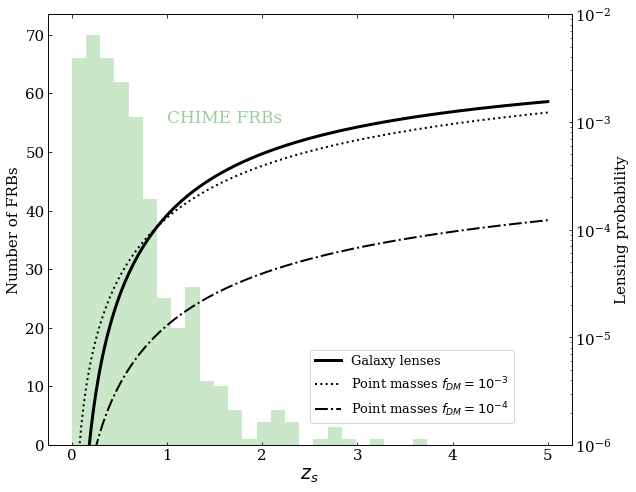

In [5]:
def intg(zl, zs, fdm, mbias=2):
    """ Calculate point-mass lensing probability 
    for source at zs, lens at zl, 
    dark matter fraction fdm = Omega_l / Omega_c, and 
    magnification bias mbias
    """
    DL = cosmo.angular_diameter_distance(zl)
    DLS = cosmo.angular_diameter_distance_z1z2(zl, zs)
    DS = cosmo.angular_diameter_distance(zs)
    a = mbias * 1.5 * fdm * cosmo.Om0 * cosmo.H0**2 * DL * DLS / (constants.c * cosmo.H(zl) * DS) * (1+zl)**2
    return a.to(u.dimensionless_unscaled)

tb5f1=[]
tb5f3=[]
ttest=[]
zarr = np.linspace(0.05, 5, 200)

for zz in zarr:
    ttest.append(1e-2*quad(intg, 0, zz, (zz, 1, 2))[0])

for zz in zarr:
    tb5f1.append(1e-3*quad(intg, 0, zz, (zz, 1, 2))[0])
    
for zz in zarr:
    tb5f3.append(1e-4*quad(intg, 0, zz, (zz, 1, 2))[0])
    
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(111)

ax1.hist(zch, bins=25, alpha=0.25, log=False, color='C2')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax2 = ax1.twinx()

ax1.set_ylabel('Number of FRBs', fontsize=15)

y3 = np.load('./yue21_galaxy.npy')

#ax2.plot(zarr, a, color='k', lw=2)
ax2.plot(zarr, y3, lw=3, color='k')
ax2.plot(zarr, tb5f1, ':', color='k', lw=2)
ax2.plot(zarr, tb5f3, '-.', lw=2, color='k')
#ax2.plot(np.concatenate([[0],zarr]), np.array([0,] + tb5f1)*10, '-.', color='purple', lw=2, alpha=0.75)

#ax2.plot(zarr, (2**1.5/(3-1.5))*np.array(resarr), '-.', lw=2, color='C1')

ax2.semilogy()
ax1.set_xlabel(r'$z_s$', fontsize=19)
ax1.text(1, 55, 'CHIME FRBs', color='C2', alpha=0.5, fontsize=17)
ax2.set_ylim(1e-6, 0.01)
ax2.set_ylabel(r'Lensing probability', fontsize=15)
ax2.legend(['Galaxy lenses',
            r'Point masses $f_{DM}=10^{-3}$',
            r'Point masses $f_{DM}=10^{-4}$',],
            #r'Stars $\Omega_*=0.0024$'], 
           fontsize=13, loc=(0.5, 0.05))
plt.yticks(fontsize=15)
#plt.xticks(fontsize=20)
fig.tight_layout()
plt.savefig('CHIMEFRB_lens_prob.pdf')

# Figure 4

In [6]:
omega_dsa, sefd_dsa, B_dsa = 10.0, 2.5, 1300.0
omega_Ap, sefd_Ap, B_Ap, rate_Ap = 9.0, 70., 300., 50.0
D_dsa = 5.0

#rk = rate_comparison(omega_dsa, sefd_dsa, B_dsa, omega_Ap, sefd_Ap, B_ap, rate_Ap)

def rate_func(D_k, SEFD_k, nu, 
              nu_ch=(400., 800.), 
              nu_Ap=(1220., 1520.), 
              omega_ch=200., omega_Ap=9.5, 
              alpha=1.5, rate_ch=2*365, 
              rate_Ap=0.2*365, 
              SEFD_ch=60., SEFD_Ap=75.0, frac_FoV=1.0):
    nu_low, nu_hi = nu
    B1 = 1025.-nu_low
    B2 = nu_hi-1025.
    theta_1 = 3e2/(nu_low+B1/2.)/D_k
    omega_1 = frac_FoV * 1.13 * theta_1**2 * 41250. / (4*np.pi)
    theta_2 = 3e2/(nu_hi-B2/2.)/D_k
    omega_2 = frac_FoV * 1.13 * theta_2**2 * 41250. / (4*np.pi)
    B_ch = abs(diff(nu_ch))[0]
    B_ap = abs(diff(nu_Ap))[0]
    
#    print('Band 1: %d-%d-%d MHz  %0.1f deg^2' % (nu_low, nu_low+B1/2., nu_low+B1, omega_1))
#    print('Band 2: %d-%d-%d MHz  %0.1f deg^2' % (nu_hi-B2, nu_hi-B1/2., nu_hi, omega_2))
    
    rate_band_1 = rate_ch * omega_1 / omega_ch * (SEFD_ch / SEFD_k * np.sqrt(B1/B_ch))**alpha
    rate_band_2 = rate_Ap * omega_2 / omega_Ap * (SEFD_Ap / SEFD_k * np.sqrt(B2/B_Ap))**alpha
    print(rate_band_1, rate_band_2)
    return rate_band_1 + rate_band_2

def rate_func_brst(omega, SEFD_k, B, 
              nu_ch=(400., 800.), 
              nu_Ap=(1220., 1520.), 
              omega_ch=200., omega_Ap=9.5, 
              alpha=1.5, rate_ch=2*365, 
              SEFD_ch=60., SEFD_Ap=75.0, frac_FoV=1.0):
    
    rate_band = rate_ch * omega / omega_ch * (SEFD_k/SEFD_ch)**alpha
    
    return rate_band

def rate_func_fast(D_k, SEFD_k, nu, 
              nu_ch=(400., 800.), 
              nu_Ap=(1000., 1500.), 
              omega_ch=200., omega_Ap=0.022, 
              alpha=1.5, rate_ch=2*365, 
              rate_Ap=20.0, 
              SEFD_ch=60., SEFD_Ap=1.8, frac_FoV=1.0):
    nu_low, nu_hi = nu
    B1 = 1025.-nu_low
    B2 = nu_hi-1025.
    B3 = 300.0
    theta_1 = 3e2/(nu_low+B1/2.)/D_k
    omega_1 = frac_FoV * 1.13 * theta_1**2 * 41250. / (4*np.pi)
    theta_2 = 3e2/(nu_hi-B2/2.)/D_k
    omega_2 = frac_FoV * 1.13 * theta_2**2 * 41250. / (4*np.pi)

    theta_3 = 3e2/(450.)/D_k
    omega_3 = frac_FoV * 1.13 * theta_3**2 * 41250. / (4*np.pi)
    
    B_ch = abs(diff(nu_ch))[0]
    B_ap = abs(diff(nu_Ap))[0]    

    print('Band 1: %d-%d-%d MHz  %0.1f deg^2' % (nu_low, nu_low+B1/2., nu_low+B1, omega_1))
    print('Band 2: %d-%d-%d MHz  %0.1f deg^2' % (nu_hi-B2, nu_hi-B1/2., nu_hi, omega_2))
    
    rate_band_1 = rate_ch * omega_1 / omega_ch * (SEFD_ch / SEFD_k * np.sqrt(B1/B_ch))**alpha
    rate_band_2 = rate_Ap * omega_2 / omega_Ap * (SEFD_Ap / SEFD_k * np.sqrt(B2/B_Ap))**alpha
    rate_band_3 = rate_ch * omega_3 / omega_ch * (SEFD_ch / SEFD_k * np.sqrt(B3/B_ch))**alpha
    print(omega_1, omega_2, omega_3)
    print(rate_band_1, rate_band_2, rate_band_3)
    return rate_band_1 + rate_band_2

def rate_func_3(D_k, SEFD_k, nu, 
              nu_ch=(400., 800.), 
              nu_Ap=(1000., 1500.), 
              omega_ch=200., omega_Ap=0.022, 
              alpha=1.5, rate_ch=2*365, 
              rate_Ap=20.0, 
              SEFD_ch=60., SEFD_Ap=1.8, frac_FoV=1.0):
    nu_low, nu_hi = nu
    B1 = 515.-300.
    B2 = 880.-515.
    B3 = 1500.-880.
    theta_1 = 3e2/(0.5*(300.+515.))/D_k
    omega_1 = frac_FoV * 1.13 * theta_1**2 * 41250. / (4*np.pi)
    theta_2 = 3e2/(0.5*(880.+515.))/D_k
    omega_2 = frac_FoV * 1.13 * theta_2**2 * 41250. / (4*np.pi)
    theta_3 = 3e2/(0.5*(1500.+880.))/D_k
    omega_3 = frac_FoV * 1.13 * theta_3**2 * 41250. / (4*np.pi)
    
    B_ch = abs(diff(nu_ch))[0]
    B_ap = abs(diff(nu_Ap))[0]    

    print('Band 1: %d-%d-%d MHz  %0.1f deg^2' % (nu_low, nu_low+B1/2., nu_low+B1, omega_1))
    print('Band 2: %d-%d-%d MHz  %0.1f deg^2nca' % (nu_hi-B2, nu_hi-B1/2., nu_hi, omega_2))
    
    rate_band_1 = rate_ch * omega_1 / omega_ch * (SEFD_ch / SEFD_k * np.sqrt(B1/B_ch))**alpha
    rate_band_2 = rate_Ap * omega_2 / omega_Ap * (SEFD_Ap / SEFD_k * np.sqrt(B2/B_Ap))**alpha
    rate_band_3 = rate_ch * omega_3 / omega_ch * (SEFD_ch / SEFD_k * np.sqrt(B3/B_ch))**alpha
    print(omega_1, omega_2, omega_3)
    print(rate_band_1, rate_band_2, rate_band_3)
    return rate_band_1 + rate_band_2 + rate_band_3

## Estimate detection rates for DSA-2000, CHORD, and CASM/BURSTT

In [7]:
print("DOING DSA-2000")

# Dish diameter in meters
D_DSA = 5.
# System-equivalent flux density in Jy
sefd_ii = 6.

rate_dsa_low =  rate_func(D_DSA, sefd_ii, (700, 1600.), 
          nu_ch=(400., 800.), nu_Ap=(1000., 1500.), 
          omega_ch=200., omega_Ap=0.019, 
          alpha=1.5, rate_ch=300, 
          rate_Ap=4, 
          SEFD_ch=50., SEFD_Ap=1.33, 
          frac_FoV=1)

rate_dsa_hi =  rate_func(5.0, sefd_ii, (700, 1600.), 
                        nu_ch=(400., 800.), nu_Ap=(1000., 1500.), 
                        omega_ch=200., omega_Ap=0.019, 
                        alpha=1.5, rate_ch=1000, 
                        rate_Ap=40, 
                        SEFD_ch=50., SEFD_Ap=1.33, 
                        frac_FoV=1)

print(rate_dsa_low, rate_dsa_hi)

# Dish diameter in meters
D_chord = 6.0
# System-equivalent flux density in Jy
SEFD_chord = 9.

rate_chord_low =  rate_func_3(D_chord, SEFD_chord, (300,1500),
          nu_ch=(400., 800.), nu_Ap=(1000., 1500.), 
          omega_ch=200., omega_Ap=0.019, 
          alpha=1.5, rate_ch=300, 
          rate_Ap=4, 
          SEFD_ch=50., SEFD_Ap=1.33, 
          frac_FoV=1)

rate_chord_hi =  rate_func_3(D_chord, SEFD_chord, (300, 1500),
          nu_ch=(400., 800.), nu_Ap=(1000., 1500.), 
          omega_ch=200., omega_Ap=0.019, 
          alpha=1.5, rate_ch=1000, 
          rate_Ap=40, 
          SEFD_ch=50., SEFD_Ap=1.33, 
          frac_FoV=1)

print(rate_chord_low, rate_chord_hi)

print("DOING BRST")
xx = 0
sefd_ii = 50.
omega_brst = 5000.
rate_brst_low = rate_func_brst(omega_brst, sefd_ii, 400., rate_ch=300.)

rate_brst_hi = rate_func_brst(omega_brst, sefd_ii, 400., rate_ch=1000)

print(rate_brst_low, rate_brst_hi)

DOING DSA-2000
554.3240774024788 277.4363279638826
1847.7469246749297 2774.363279638826
831.7604053663614 4622.110204313756
Band 1: 300-407-515 MHz  55.8 deg^2
Band 2: 1135-1392-1500 MHz  19.1 deg^2nca
55.84410241161482 19.060931346901942 6.54845154373894
688.5629771208028 264.08450020306276 178.67751066963504
Band 1: 300-407-515 MHz  55.8 deg^2
Band 2: 1135-1392-1500 MHz  19.1 deg^2nca
55.84410241161482 19.060931346901942 6.54845154373894
2295.2099237360094 2640.8450020306277 595.5917022321169
1131.3249879935006 5531.646627998754
DOING BRST
5705.443307345481 19018.14435781827


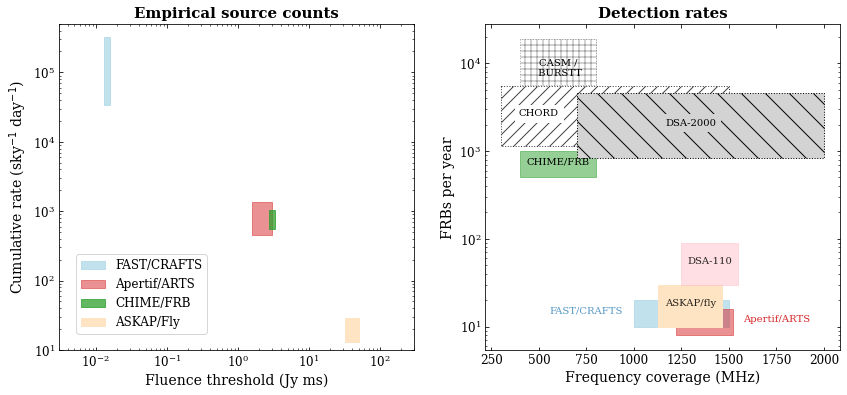

In [8]:
figure(figsize=(14,6))

subplot(121)
F_fast, R_fast, R_fast_low, R_fast_hi = 0.0146, 1.24e5, 1.24e5-0.9e5, 1.24e5+1.94e5
fill_between(np.linspace(F_fast*0.9, F_fast*1.1), R_fast_low, R_fast_hi, alpha=0.75, color='lightblue')

F_apertif, R_apertif, R_apertif_low, R_apertif_hi = 2.0, 750.0, 750-300.0, 750.+600.
fill_between(np.linspace(F_apertif*0.8, F_apertif*1.5), R_apertif_low, R_apertif_hi, alpha=0.5, color='C3')


F_chime, R_chime, R_chime_low, R_chime_hi = 3.0, 820.0, 820.0-260.0, 820.+220.
fill_between(np.linspace(F_chime*0.9, F_chime*1.1), 
             R_chime_low, R_chime_hi, alpha=0.75, color='C2')


F_askap_fly, R_askap_fly, R_askap_fly_low, R_askap_fly_hi = 57.0, 12.7, 12.7-2.2-3.6, 12.7+3.3+3.6
F_askap_fly, R_askap_fly, R_askap_fly_low, R_askap_fly_hi = 40.4, 20.7, 20.7-1.7-5.8, 20.7+2.1+5.8
#F_askap_fly, R_askap_fly, R_askap_fly_low, R_askap_fly_hi = 26., 37, 37-8, 37+8

fill_between(np.linspace(F_askap_fly*0.8, F_askap_fly*1.25), R_askap_fly_low, 
             R_askap_fly_hi, alpha=1, color='bisque', )

Sarr = np.logspace(-3,3,1000)
title('Empirical source counts', fontweight='bold')
legend(['FAST/CRAFTS','Apertif/ARTS','CHIME/FRB','ASKAP/Fly'], 
       loc=(0.05, 0.05), fontsize=12)

xlabel('Fluence threshold (Jy ms)', fontsize=14)
ylabel(r'Cumulative rate (sky$^{-1}$ day$^{-1}$)', fontsize=14)
ylim(1e1,5e5)
xlim(0.003,300)
loglog()

subplot(122)
#CHIME
fill_between(np.linspace(400, 800), 500., 1000., alpha=0.5, color='C2')
text(600, np.sqrt(500*1000.), 'CHIME/FRB', ha='center', fontsize=10)

#Fast
fill_between(np.linspace(1000, 1500), 10, 20, alpha=0.75, color='lightblue')
text(750, np.sqrt(10*20), 'FAST/CRAFTS', ha='center', fontsize=10, c='C0', alpha=0.75)

#Apertif
fill_between(np.linspace(1220, 1520), 8, 16, alpha=0.5, color='C3')
text(1750, np.sqrt(8*16), 'Apertif/ARTS', ha='center', fontsize=10, color='C3')

#ASKAP-fly
fill_between(np.linspace(1128, 1464), 10, 30, alpha=1, color='bisque')
text(1300, np.sqrt(10*30), 'ASKAP/fly', ha='center', fontsize=10, c='k', alpha=0.85)

#DSA-110
fill_between(np.linspace(1250, 1550), 30, 90, alpha=0.5, color='pink')
text(1400, np.sqrt(30*90), 'DSA-110', ha='center', fontsize=10, backgroundcolor='None', alpha=0.85)


#CHORD
fill_between(np.linspace(300, 1500), rate_chord_low, rate_chord_hi, 
             alpha=0.75, color='None', edgecolor='k', hatch='//', linestyle=':')
text(500, np.sqrt(rate_chord_low*rate_chord_hi), 'CHORD', ha='center', fontsize=10, backgroundcolor='white')


#DSA-2000
fill_between(np.linspace(700, 2000), rate_dsa_low, rate_dsa_hi, alpha=1, 
             color='lightgrey', edgecolor='k', hatch='\\', linestyle=':')
text(1300, np.sqrt(rate_dsa_low*rate_dsa_hi), 'DSA-2000', color='k', ha='center', fontsize=10, backgroundcolor='lightgrey')


#BRST
fill_between(np.linspace(400, 800), rate_brst_low, rate_brst_hi, alpha=0.35, 
             color='None', edgecolor='k', hatch='++', linestyle=':')
text(600, 0.7*np.sqrt(rate_brst_low*rate_brst_hi), 'CASM /\n BURSTT', color='k', ha='center', fontsize=10, backgroundcolor='None')


title('Detection rates', fontweight='bold')
ylabel('FRBs per year')
xlabel('Frequency coverage (MHz)')

semilogy()
savefig('frb-rates-figure.pdf')

# Figure 5

In [9]:
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
import astropy.constants as constants
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

Lmax = 0.001
z_arr_casm, S_arr_casm = [], []
gam = 1.5
z = np.linspace(0.1,5,10000)

# CASM Redshift distribution
for ii,zz in enumerate(z):
    Nz = 25 * (1+zz)**-1 * cosmo.differential_comoving_volume(zz).value / 1e8
    Nz = int(Nz)
    L = np.random.uniform(Lmax,1,Nz)**(-1/gam) * 0.5e36 * u.erg * u.s**-1 * u.Hz**-1
    DL = cosmo.luminosity_distance(zz)
    S = L/(4*np.pi*DL**2)
    S = S.to(u.Jy)
    for SS in S:
        if SS.value>150.0:
            z_arr_casm.append(zz)
            S_arr_casm.append(SS)
            
z_arr_dsa, S_arr_dsa = [], []

# DSA-2000 Redshift distribution:
for ii,zz in enumerate(z):

    Nz = 0.1 * (1+zz)**-1 * cosmo.differential_comoving_volume(zz).value / 1e8
    Nz = int(Nz)
    L = np.random.uniform(Lmax,1,Nz)**(-1/gam)* 0.5e36 * u.erg * u.s**-1 * u.Hz**-1
    DL = cosmo.luminosity_distance(zz)
    S = L/(4*np.pi*DL**2)
    S = S.to(u.Jy)
    for SS in S:
        if SS.value>5.0:
            z_arr_dsa.append(zz)
            S_arr_dsa.append(SS)

z_arr_chord, S_arr_chord = [], []

# CHORD Redshift distribution:
for ii,zz in enumerate(z):

    Nz = 0.5 * (1+zz)**-1 * cosmo.differential_comoving_volume(zz).value / 1e8
    Nz = int(Nz)
    L = np.random.uniform(Lmax,1,Nz)**(-1/gam)* 0.5e36 * u.erg * u.s**-1 * u.Hz**-1
    DL = cosmo.luminosity_distance(zz)
    S = L/(4*np.pi*DL**2)
    S = S.to(u.Jy)
    for SS in S:
        if SS.value>9.0:
            z_arr_chord.append(zz)
            S_arr_chord.append(SS)

In [10]:
print("Median redshifts for each survey:")
print("CASM <z> = %.2f %.2f Nfrb=%d"%(median(z_arr_casm), mean(z_arr_casm), len(z_arr_casm[::4])))
print("CHORD <z> = %.2f %.2f Nfrb=%d"%(median(z_arr_chord), mean(z_arr_chord), len(z_arr_chord[::3])))
print("DSA <z> = %.2f %.2f Nfrb=%d"%(median(z_arr_dsa), mean(z_arr_dsa), len(z_arr_dsa)))

Median redshifts for each survey:
CASM <z> = 0.36 0.43 Nfrb=176446
CHORD <z> = 0.93 1.01 Nfrb=41905
DSA <z> = 1.12 1.19 Nfrb=33812


Text(0, 0.5, '$N_{FRB}$')

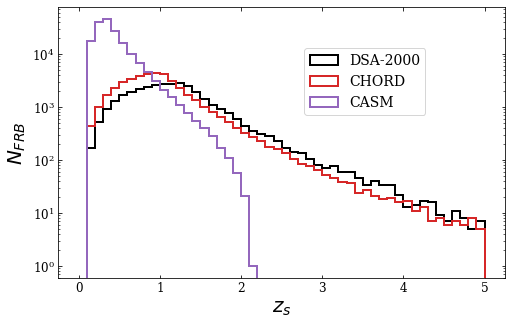

In [11]:
figure(figsize=(8,5))
hist(z_arr_dsa, log=True, bins=50, lw=2, range=(0,5), histtype='step', color='k')
hist(z_arr_chord[::3], log=True, bins=50, lw=2, range=(0,5), histtype='step', color='C3')
hist(z_arr_casm[::4], log=True, alpha=1, lw=2, bins=50, range=(0,5), histtype='step',color='C4')

legend(['DSA-2000','CHORD','CASM'], loc=(0.55,0.6))
#hist(zch, log=True, alpha=0.25, bins=50, range=(0,5), color='C2')
xlabel(r'$z_s$', fontsize=20)
ylabel(r'$N_{FRB}$', fontsize=20)
#savefig('zfrb_forecast.pdf')

In [12]:
PBH_prob=[]

# Calculate lensing probability for PBH
# population. Assume f_PBH = 1 and then 
# scale afterwards.
for zz in zarr:
    PBH_prob.append(quad(intg, 0, zz, (zz, 1, 2))[0])

In [59]:
def calc_fpbh(nyear=4):
    np.random.shuffle(z_arr_casm)
    np.random.shuffle(z_arr_dsa)
    np.random.shuffle(z_arr_chord)

    tau_total_brst=0

    for ii in range(nyear*16250):
        tau_total_brst += PBH_prob[np.argmin(abs(z_arr_casm[ii]-zarr))]
#    print('CASM:', 1 / n1, n1)

    tau_total_chord=0
    for ii in range(nyear*3550):
        tau_total_chord += PBH_prob[np.argmin(abs(z_arr_chord[ii]-zarr))]
#    print('CHORD:', 1 / tau_total_chord, tau_total_chord)

    tau_total_dsa=0
    for ii in range(nyear*2400):
        tau_total_dsa += PBH_prob[np.argmin(abs(z_arr_dsa[ii]-zarr))]
#    print('DSA2000:', 1 / tau_total_dsa, tau_total_dsa)

    tau_total_chime=0
    for ii in range(len(zch)):
        # Assume CHIME/FRB cannot analyze DM>1000 / z>0.8
        if zch[ii]>0.8:
            continue
        tau_total_chime += nyear*PBH_prob[np.argmin(abs(zch[ii]-zarr))]
#    print('DSA2000:', 1 / tau_total_dsa, tau_total_dsa)

    return tau_total_dsa, tau_total_chord, tau_total_brst, tau_total_chime

tau_total_dsa_tot = []
tau_total_chord_tot = []
tau_total_brst_tot = []
tau_total_chime_tot = []

# Montecarlo the optical depth calculation
for ii in range(100):
    tau_total_dsa, tau_total_chord, tau_total_brst, tau_total_chime = calc_fpbh()
    tau_total_dsa_tot.append(x)
    tau_total_chord_tot.append(y)
    tau_total_brst_tot.append(w)
    tau_total_chime_tot.append(tau_total_chime)
    
tau_total_dsa_tot = np.array(tau_total_dsa_tot)
tau_total_chord_tot = np.array(tau_total_chord_tot)
tau_total_brst_tot = np.array(tau_total_brst_tot)

In [60]:
print(np.mean(1/tau_total_dsa_tot), np.mean(1/tau_total_chord_tot), np.mean(1/tau_total_brst_tot))

0.0005551130648689388 0.00048529906060050385 0.0004525862734494593


In [61]:
print("DSA-2000 fPBH upper-limit %0.4f" % (2.3/np.mean(tau_total_dsa_tot)))
print("CHORD fPBH upper-limit %0.4f" % (2.3/np.mean(tau_total_chord_tot)))
print("BRSTT fPBH upper-limit %0.4f" % (2.3/np.mean(tau_total_brst_tot)))
print("CHIME fPBH upper-limit %0.4f" % (2.3/np.mean(tau_total_chime_tot)))

DSA-2000 fPBH upper-limit 0.0013
CHORD fPBH upper-limit 0.0011
BRSTT fPBH upper-limit 0.0010
CHIME fPBH upper-limit 0.0581


# Figure 9

In [30]:
# Change directories to where you have https://github.com/FRBs/FRB
%cd /Users/liamconnor/code/FRB/frb
import halos
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import astropy.constants as constants

from scipy.integrate import quad, dblquad

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

/Users/liamconnor/code/FRB/frb


rhoV normalized to 0.0002799816644238597 1 / cm3 to give M_b=158048780487.80487 solMass


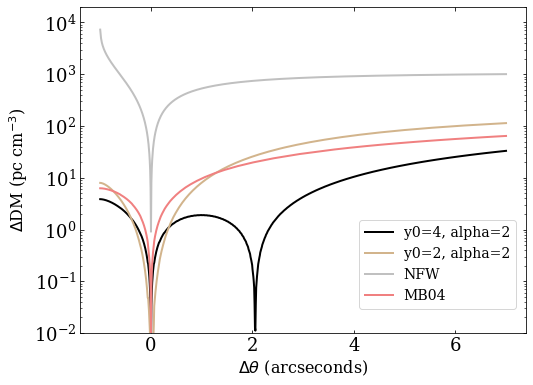

In [94]:
plt.figure(figsize=(8,6))

theta = np.linspace(0, 8, 1000)
ddm1=[]
zz=1.0
halomodel = halos.ModifiedNFW(log_Mhalo=12., z=zz, y0=4, alpha=2)
dm0 = halomodel.Ne_Rperp(1/3600./57.*cosmo.angular_diameter_distance(zz)).value

for th in theta:
    Rperp = th/3600./57.*cosmo.angular_diameter_distance(zz)
    dm1 = halomodel.Ne_Rperp(Rperp).value
    ddm1.append(abs(dm1-dm0))

plot(theta-1, ddm1, c='k', lw=2)    

ddm2=[]
zz=1.0
halomodel = halos.ModifiedNFW(log_Mhalo=12., z=zz, y0=2, alpha=2)
dm0 = halomodel.Ne_Rperp(1/3600./57.*cosmo.angular_diameter_distance(zz)).value

for th in theta:
    Rperp = th/3600./57.*cosmo.angular_diameter_distance(zz)
    dm1 = halomodel.Ne_Rperp(Rperp).value
    ddm2.append(abs(dm1-dm0))

plot(theta-1, ddm2, c='tan', lw=2) 

ddm3=[]
zz=1.0
halomodel = halos.ModifiedNFW(log_Mhalo=12., z=zz)
dm0 = halomodel.Ne_Rperp(1/3600./57.*cosmo.angular_diameter_distance(zz)).value

for th in theta:
    Rperp = th/3600./57.*cosmo.angular_diameter_distance(zz)
    dm1 = halomodel.Ne_Rperp(Rperp).value
    ddm3.append(abs(dm1-dm0))

plot(theta-1, ddm3, c='silver', lw=2) 

ddm3=[]
zz=1.0
halomodel = halos.MB04(log_Mhalo=12., z=zz)
dm0 = halomodel.Ne_Rperp(1/3600./57.*cosmo.angular_diameter_distance(zz)).value

for th in theta:
    Rperp = th/3600./57.*cosmo.angular_diameter_distance(zz)
    dm1 = halomodel.Ne_Rperp(Rperp).value
    ddm3.append(abs(dm1-dm0))

plot(theta-1, ddm3, c='lightcoral', lw=2) 
semilogy()
ylim(1e-2,2e4)
xlabel(r'$\Delta\theta$ (arcseconds)', fontsize=16)
ylabel(r'$\Delta$DM (pc cm$^{-3}$)', fontsize=16)
legend(['y0=4, alpha=2','y0=2, alpha=2','NFW','MB04'], loc=(0.625, 0.075))
savefig('delta_dm_cgm_frb.pdf')

In [249]:
def D_eff(zl, zs):
    """ Calculate the effective lensing distance 
    for a lens at zl and a source at zs.
    """
    Ds = P.angular_diameter_distance(zs)
    Dl = P.angular_diameter_distance(zl)
    Dls = P.angular_diameter_distance_z1z2(zl, zs)
    Deff = Dls / (Dl * Ds)
    
    return Dl, Ds, Dls, Deff

def theta_ein(M, zl=0.5, zs=1, prof='ps', sigma=None):
    """ Get Einstein radius for mass M 
    in units of M_sun, lens redshift (zl), 
    and source redshift (zs) for a given 
    density profile.
    """
    M *= u.M_sun
    Dl, Ds, Dls, Deff = D_eff(zl, zs)
    
    if prof=='ps':
        print("Assuming point source mass function")
        theta = np.sqrt(4*const.G*M*Deff/const.c**2)
        
    if prof=='SIS':
        if sigma is None:
            print("Expected a velocity dispersion sigma for SIS")
            return 
        theta = 4 * np.pi / const.c**2 * (sigma*u.km/u.s)**2 * Dls / Ds
        
    if prof=='NFW':
        pass
    
    return theta.decompose()*u.rad

def tau_integrand_BH(zl, zs=1, f=1.0):
    """Get lensing optical depth integrand from Eq. 2
    assuming a fraction f of the Universe's matter in 
    compact halos or blackholes 
    
    Parameters:
    -----------
    zl : float 
        lens redshift 
    zs : float 
        source redshift 
    f  : float 
        fraction of critical mass in halos 
        
    Returns:
    --------
    Integrand"""
    M = const.M_sun # Note mass actually doesn't affect integral
    dV = P.differential_comoving_volume
    Deff = D_eff(zl, zs)[-1]
    theta_e = np.sqrt(4 * const.G * M / const.c**2 * Deff) * u.sr
    rho_crit = 3 * P.H0**2 / (8*np.pi*const.G)
    n = f * P.Om0 * rho_crit / M
    tau_int = 1/(4*np.pi*u.sr) * n * dV(zl) * np.pi * theta_e**2
    tau_int *= (u.km**2).to(u.m**2) * u.m**2/u.km**2
    return tau_int

def n_sig(zl, sig, mu=200, var=1000):
    """ For now assume redshift independence. 
    The number of halos above 10**10 solar masses is 
    6e-3 according to
    http://inspirehep.net/record/1125519/plots 
    """
    gauss = (2*np.pi*var)**-0.5*np.exp(-(sig-mu)**2/(2*var))
    gauss *= u.Mpc**-3
    gauss *= 6e-3
    gauss = gauss
    
    return gauss

def tau_integrand_SIS(zl, sig, zs=1, B=1):
    """Get lensing optical depth integrand from Eq. 2
    assuming SIS and sig vel dispersion
    
    Parameters:
    -----------
    zl : float 
        lens redshift 
    zs : float 
        source redshift 
    sig  : float 
        halo vel dispersion in km/s
        
    Returns:
    --------
    Integrand"""
    dV = P.differential_comoving_volume
    n_of_sig = n_sig(zl, sig)
    theta_e = theta_ein(1, zl=0.5, zs=1, prof='SIS', sigma=sig)
    tau_int = B * n_of_sig * np.pi*theta_e**2 * dV(zl)

    return tau_int.decompose()

def tau_integral(zs, f=0.3, n=100):
    zl_arr = np.linspace(0.01, zs, n)
    tau_arr = np.zeros_like(zl_arr)
    
    for ii, zs in enumerate(zl_arr):
        val = quad(tau_integrand_BH, 0, zs, (zs, f))[0]
        tau_arr[ii] = val
        
    return zl_arr, tau_arr

def Pz(z):
    return 5e-4*z**3 / (1+0.41*z**1.1)**2.7

In [250]:
# Mass functions http://astronomy.nmsu.edu/aklypin/COSMOLOGY/HaloMassFunction.pdf

def f_sigma(sigma, name='ps'):
    """
    """
    delta_c = 1.686

    if name=='ps':
        print("Assuming Press-Schecter")
        f = np.sqrt(2/np.pi) * delta_c/sigma * np.exp(-delta_c**2 * 0.5 / sigma**2)
    elif name=='st':
        print("Assuming Sheth-Torman")
        A = 0.3222
        a = 0.707
        p = 0.3
        f = A * np.sqrt(2*a/np.pi) * (1+(sigma**2/(a*delta_c**2))**p) * delta_c / sigma * np.exp(-a*delta_c**2/(2*sigma**2))
    else:
        print("Expecting either ps or st as name")
        return f
    
    return f

def n_of_M(sigma, M, name='ps'):
    """ Calculate the differential mass function 
    of halos in the Universe as a function of sigma (RMS density fluctuations) 
    and M
    """
    f = f_sigma(sigma, name=name)
    rho_crit = 3 * P.H0**2 / (8*np.pi*const.G)
    dlogsiginv_dm = 1
    print("Haven't implemented dlogsiginv_dm yet!")
    n_of_M_ = f * P.Om0 * rho_crit / M * dlogsiginv_dm
    return n_of_M_.to(u.Msun/u.Mpc**3)
    
def mass_func_integrand(zl,zs=1.0,M=1e6):
    """ Get differential number of lenses at mass M
    at zl for source at zs. 
    """
    Amp_M6 = 1e3 * u.Mpc**3 # amplitude of mass number density for 1e6 solar mass halos
    dV = P.differential_comoving_volume(zl)
    N = Amp_M6 * (M/1e6)**-0.75 * np.pi * theta_ein(M, prof='ps', zl=zl, zs=zs)**2 * dV
    return N

In [32]:
zls, tau_arr = tau_integral(zs, f=0.3, n=25)
zls, tau_arr2 = tau_integral(zs, f=0.15, n=25)

In [99]:
def n_of_s(N, dist='lnormal'):
    
    if dist=='lnormal':
        s = np.random.lognormal(-1.1, 1.5, N)
    
    if dist=='gaussian':
        s = np.random.normal(10, 1, N)
    
    if type(dist)==float or type(dist)==int:
        s = np.random.uniform(0.001,1,N)**(-1./(dist))
    
    return s

def snr_fft(s):
    Np = len(s)
    return 0.5 * np.sqrt(Np) * np.mean(s)

def snr_sp(s, max=None):
    if max==None:
        return s.max()
    else:
        return min(s.max(), s.min()*1e5)

def r_sp_mean(s):
    Np = len(s)
    sav = np.mean(s)*(1-np.log(Np)/(Np-1.))
    r = 2/1.06*s.max()/sav
    return r
    
rarrx=[]
narr=np.logspace(1,5,50)
for nn in narr:
    for ii in range(500):
        s = n_of_s(int(nn), dist='lnormal')
#        r = snr_sp(s) / snr_fft(s)
        r = r_sp_mean(s)
        rarrx.append(r)
    

In [39]:
print("DOING DSA-2000")
xx = 0
sefd_ii = 6.
rate_dsa_low =  rate_func(5.0, sefd_ii, (700+xx, 1600.), 
          nu_ch=(400., 800.), nu_Ap=(1000., 1500.), 
          omega_ch=200., omega_Ap=0.019, 
          alpha=1.5, rate_ch=300, 
          rate_Ap=4, 
          SEFD_ch=50., SEFD_Ap=1.33, 
          frac_FoV=1)

rate_dsa_hi =  rate_func(5.0, sefd_ii, (700+xx, 1600.), 
          nu_ch=(400., 800.), nu_Ap=(1000., 1500.), 
          omega_ch=200., omega_Ap=0.019, 
          alpha=1.5, rate_ch=1000, 
          rate_Ap=40, 
          SEFD_ch=50., SEFD_Ap=1.33, 
          frac_FoV=1)

print(rate_dsa_low, rate_dsa_hi)

# rate_func(5.0, sefd_ii, (700+xx, 1600.), 
#           nu_ch=(400., 800.), nu_Ap=(1250., 1550.), 
#           omega_ch=200., omega_Ap=9., 
#           alpha=1.5, rate_ch=500, 
#           rate_Ap=90, 
#           SEFD_ch=70., SEFD_Ap=70, 
#           frac_FoV=1)

DOING DSA-2000
554.3240774024788 277.4363279638826
1847.7469246749297 2774.363279638826
831.7604053663614 4622.110204313756


In [162]:
print("DOING CHORD")
xx = 0
sefd_ii = 50.
omega_brst = 5000.
rate_brst_low = rate_func_brst(omega_brst, sefd_ii, 400., rate_ch=300.)


rate_brst_hi = rate_func_brst(omega_brst, sefd_ii, 400., rate_ch=1000)

print(rate_brst_low, rate_brst_hi)

DOING CHORD
5705.443307345481 19018.14435781827


In [ ]:
print("DOING BRST")
xx = 0
sefd_ii = 50.
rate_brst_low = rate_func_brst(6.0, sefd_ii, (400.0, 800.), 
          nu_ch=(400., 800.), nu_Ap=(1000., 1500.), 
          omega_ch=200., omega_Ap=0.019, 
          alpha=1.25, rate_ch=300, 
          rate_Ap=4, 
          SEFD_ch=50., SEFD_Ap=1.33, 
          frac_FoV=1)

rate_brst_hi = rate_func_brst(6.0, sefd_ii, (400.0, 800.), 
          nu_ch=(400., 800.), nu_Ap=(1000., 1500.), 
          omega_ch=200., omega_Ap=0.019, 
          alpha=1.25, rate_ch=1000., 
          rate_Ap=40, 
          SEFD_ch=50., SEFD_Ap=1.33, 
          frac_FoV=1)

print(rate_brst_low, rate_brst_hi)

In [114]:
rate_func_fast(5.0, 5.0, (700, 2000), 
              nu_ch=(400., 800.), 
              nu_Ap=(1000., 1500.), 
              omega_ch=200., omega_Ap=0.019, 
              alpha=1.5, rate_ch=2*365, 
              rate_Ap=20.0, 
              SEFD_ch=100., SEFD_Ap=1.8, frac_FoV=1.0)

8227.658266230115

In [ ]:
omega_chord_1, sefd_chord_1, B_chord_1 = 10.0, 2.5, 725.
omega_Ap, sefd_Ap, B_ap, rate_Ap = 9.0, 70., 300., 50.0
D_dsa = 5.0

For DSA/CHORD frequencies closer to CHIME's band, extrapolate from CHIME. For frequencies closer to Apertif, use that. 

DSA-2000 :  700-1025 MHz (CHIME)    1025-2000 MHz (Apertif)

CHORD    :  300-1025 MHz (CHIME)    1025-1500 MHz (Apertif)

Note! The DSA-2000 10.6 sq deg number comes from a weighted integral under a Gaussian beam:

https://www.cv.nrao.edu/~sransom/web/Ch3.html#S1 equation 3.118

This is different from the solid angle of a cone with opening angle theta / 2


In [106]:
for ff in [916, 1350, 1600]:
    omega_dsa_ff = 2*np.pi*(1-np.cos(0.5 * 3e2/ff/D_dsa))*41500./(4*np.pi)
    rk = rate_comparison(omega_dsa_ff, sefd_dsa, 400.0, omega_Ap, sefd_Ap, B_ap, rate_Ap)
    print('%d FRBs per year' % rk)

NameError: name 'rate_comparison' is not defined

In [102]:
for ff in [916, 1350, 1600]:
    omega_dsa_ff = 2*np.pi*(1-np.cos(0.5 * 3e2/ff/D_dsa))*41500./(4*np.pi)
    rk = rate_comparison(omega_dsa_ff, sefd_dsa, 400.0, omega_Ap, sefd_Ap, B_ap, rate_Ap)
    print('%d FRBs per year' % rk)

NameError: name 'rate_comparison' is not defined

In [4]:
import pandas as pd
datapd = pd.read_csv('/Users/liamconnor/work/projects/frb/chime_cgm/data/chimefrbcat1.csv')
ind = np.where((datapd['repeater_name']=='-9999') & (np.abs(
datapd['gb'])>5.0))[0]
ra_ch, dec_ch = datapd['ra'][ind].values, datapd['dec'][ind].values
ra_ch_err, dec_ch_err = datapd['ra_err'][ind].values, datapd['dec_err'][ind].values
dm_ch = datapd['dm_exc_ne2001'][:].values
datapd.keys()

Index(['tns_name', 'previous_name', 'repeater_name', 'ra', 'ra_err',
       'ra_notes', 'dec', 'dec_err', 'dec_notes', 'gl', 'gb', 'exp_up',
       'exp_up_err', 'exp_up_notes', 'exp_low', 'exp_low_err', 'exp_low_notes',
       'bonsai_snr', 'bonsai_dm', 'low_ft_68', 'up_ft_68', 'low_ft_95',
       'up_ft_95', 'snr_fitb', 'dm_fitb', 'dm_fitb_err', 'dm_exc_ne2001',
       'dm_exc_ymw16', 'bc_width', 'scat_time', 'scat_time_err', 'flux',
       'flux_err', 'flux_notes', 'fluence', 'fluence_err', 'fluence_notes',
       'sub_num', 'mjd_400', 'mjd_400_err', 'mjd_inf', 'mjd_inf_err',
       'width_fitb', 'width_fitb_err', 'sp_idx', 'sp_idx_err', 'sp_run',
       'sp_run_err', 'high_freq', 'low_freq', 'peak_freq', 'chi_sq', 'dof',
       'flag_frac', 'excluded_flag'],
      dtype='object')

ValueError: x and y must have same first dimension, but have shapes (200,) and (25,)

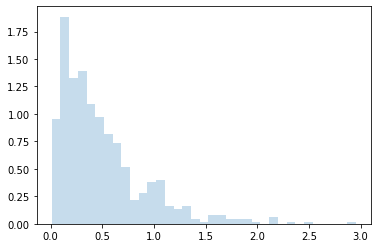

In [5]:
a = np.load('/Users/liamconnor/code/lensQSOsim/analytical/yue21.npy')
b = np.load('/Users/liamconnor/code/lensQSOsim/analytical/oguri19.npy')
zarr = np.linspace(0.01,5,200)

hist((-50+dm_ch)/1000., bins=35, alpha=0.25, density=True, log=False)
plot(zarr, a, color='k')
plot(zarr, b, ':', color='k')
xlabel(r'$z_s$', fontsize=15)
ylabel(r'Lensing probability $\tau(z_s)$')
legend(['Yue+21','Oguri19'], fontsize=12)
savefig('lens_prob.pdf')

In [38]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import astropy.constants as constants

from scipy.integrate import quad, dblquad

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

def func(zl, zs, fdm):
    DL = cosmo.angular_diameter_distance(zl)
    DLS = cosmo.angular_diameter_distance_z1z2(zl,zs)
    DS = cosmo.angular_diameter_distance(zs)
    a = cosmo.H0**2 / cosmo.H(zl) / constants.c * DL*DLS/DS * (1+zl)**2 * 25
    b = 1.5 * fdm * 0.24
    return (a * b).value

resarr=[]
for zz in zarr:
    res = quad(func, 0, zz, args=(zz, 1e-4))[0]
    resarr.append(res)

In [39]:
def theta_E_func_ps(M_L, zl, zs, cosmo):

    Dl = cosmo.angular_diameter_distance(zl)
    Ds = cosmo.angular_diameter_distance(zs)
    Dls = cosmo.angular_diameter_distance_z1z2(zl, zs)

    return (1.63e-6*u.arcsec * (M_L)**0.5 * (Dl*Ds/(3.06*u.Gpc*Dls))**-0.5).to(u.rad).value

def tau_integral_pointsource(z, zs, M_L, f_ML, cosmo):
    if z>zs:
        return 0

    # velocity dispersion distribution                                                              
#    vdfterm = vdf(sigma, z) / sigma / np.log(10) * u.Mpc**-3                                       
    # pointsource density term                                                                      
    psterm = cosmo.Om(z)*cosmo.critical_density(z)*f_ML/(M_L*u.M_sun)
    psterm = psterm.to(u.Mpc**-3)

    dV = cosmo.differential_comoving_volume(z)

    theta_E = theta_E_func_ps(M_L, z, zs, cosmo)
    area  = np.pi * theta_E **2 / (4*np.pi) * u.sr

    return psterm * dV * area

def taum_pointsource(zs, M_L, f_ML, cosmo=cosmo):
    paras = [zs, M_L, f_ML, cosmo]
#    result = quad(tau_integral_pointsource, 0, zs, args=paras)                                     
    result = quad(tau_integral_pointsource, 0.0, zs, (zs, M_L, f_ML, cosmo))

    return result[0]


NameError: name 'tb5f1' is not defined

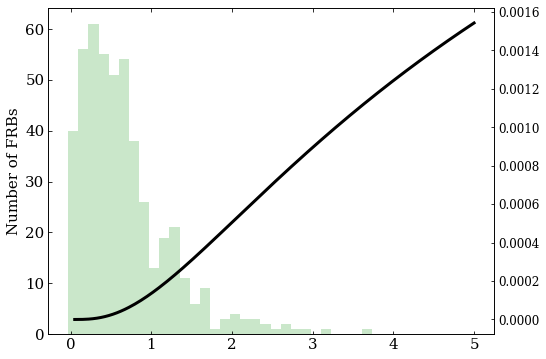

In [40]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

a = 800.0
b = 800.0 - dm_ch
c = 100. - dm_ch
z_ch = (-b + np.sqrt(b**2 - 4*a*c))/(2.*a)
zarr = np.linspace(0.05, 5, 200)

ax1.hist(zch, bins=30, alpha=0.25, log=False, color='C2')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax2 = ax1.twinx()

ax1.set_ylabel('Number of FRBs', fontsize=15)

#y1 = np.load('/Users/liamconnor/code/lensQSOsim/analytical/yue21_mbias_alpha2p5_f-3.npy')
#y2 = np.load('/Users/liamconnor/code/lensQSOsim/analytical/yue21_mbias_alpha2p5_f-1.npy')
y3 = np.load('/Users/liamconnor/code/lensQSOsim/analytical/yue21_galaxy.npy')

#ax2.plot(zarr, a, color='k', lw=2)
ax2.plot(zarr, y3, lw=3, color='k')
ax2.plot(zarr, tb5f1, ':', color='k', lw=2)
ax2.plot(zarr, tb5f3, '-.', lw=2, color='k')
#ax2.plot(zarr, (2**1.5/(3-1.5))*np.array(resarr), '-.', lw=2, color='C1')

ax2.semilogy()
ax1.set_xlabel(r'$z_s$', fontsize=19)
ax1.text(0.4, 80, 'CHIME FRBs', color='C2', alpha=0.5, fontsize=17)
ax2.set_ylim(1e-6, 0.01)
ax2.set_ylabel(r'Lensing probability', fontsize=15)
ax2.legend(['Galaxy lenses',
            r'Point masses $f_{DM}=10^{-3}$',
            r'Point masses $f_{DM}=10^{-4}$'], 
           fontsize=13, loc=(0.5, 0.05))
plt.yticks(fontsize=15)
fig.tight_layout()
#plt.savefig('CHIMEFRB_lens_prob.pdf')

In [ ]:
from astropy import constants

def intg(zl, zs, fdm):
    DL = cosmo.angular_diameter_distance(zl)
    DLS = cosmo.angular_diameter_distance_z1z2(zl, zs)
    DS = cosmo.angular_diameter_distance(zs)
    a = 4 * 1.5 * fdm * cosmo.Om0 * cosmo.H0**2 * DL * DLS / (constants.c * cosmo.H(zl) * DS) * (1+zl)**2
    return a.to(u.dimensionless_unscaled)

tb5f1=[]
tb5f3=[]
zarr = np.linspace(0.05, 5, 1000)

for zz in zarr:
    tb5f1.append(quad(intg, 0, zz, (zz, 1))[0])
    
for zz in zarr:
    tb5f3.append(quad(intg, 0, zz, (zz, 1))[0])

In [ ]:
n1,n2,n3=0,0,0
for ii in range(16250):
    n1 += tb5f3[np.argmin(abs(z_arr_casm[ii]-zarr))]
    n2 += tb5f1[np.argmin(abs(z_arr_casm[ii]-zarr))]
    n3 += y3[np.argmin(abs(z_arr_casm[ii]-zarr))]

print(2.3 / 50000.0 * (n1/599.0)**-1)

In [ ]:
z_arr_casm

In [ ]:
n1=0

np.random.shuffle(z_arr_casm)
np.random.shuffle(z_arr_dsa)
np.random.shuffle(z_arr_chord)

for ii in range(16250):
    n1 += tb5f3[np.argmin(abs(z_arr_casm[ii]-zarr))]
print('CASM:', 1 / n1, n1)
n1=0
for ii in range(3550):
    n1 += tb5f3[np.argmin(abs(z_arr_chord[ii]-zarr))]
print('CHORD:', 1 / n1, n1)
n1=0
for ii in range(2400):
    n1 += tb5f3[np.argmin(abs(z_arr_dsa[ii]-zarr))]
print('DSA2000:', 1 / n1, n1)

In [42]:
n1,n2,n3=0,0,0
for ii in range(599):
    n1 += tb5f3[np.argmin(abs(zch[ii]-zarr))]
    n2 += tb5f1[np.argmin(abs(zch[ii]-zarr))]
    n3 += y3[np.argmin(abs(zch[ii]-zarr))]

print(2.3 / 50000.0 * (n1/599.0)**-1)

NameError: name 'tb5f3' is not defined

# plt.rcParams.update({
                    'font.size': 12,
                    'font.family': 'serif',
                    'axes.labelsize': 14,
                    'axes.titlesize': 15,
                    'xtick.labelsize': 12,
                    'ytick.labelsize': 12,
                    'xtick.direction': 'in',
                    'ytick.direction': 'in',
                    'xtick.top': True,
                    'ytick.right': True,
                    'lines.linewidth': 0.5,
                    'lines.markersize': 5,
                    'legend.fontsize': 14,
                    'legend.borderaxespad': 0,
                    'legend.frameon': True,
                    'legend.loc': 'lower right'})

colors1 = ['k', '#482677FF', '#238A8DDF', '#95D840FF']

In [43]:
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

def speak(Lbol, z, nu=(1,1.35)):
    Dz = cosmo.luminosity_distance(z)
    S = Lbol / (4*np.pi*Dz**2)
    return S

S = speak(1e44 * u.erg * u.s**-1, 1)


In [44]:
from scipy.optimize import curve_fit

NameError: name 'rate_chord_low' is not defined

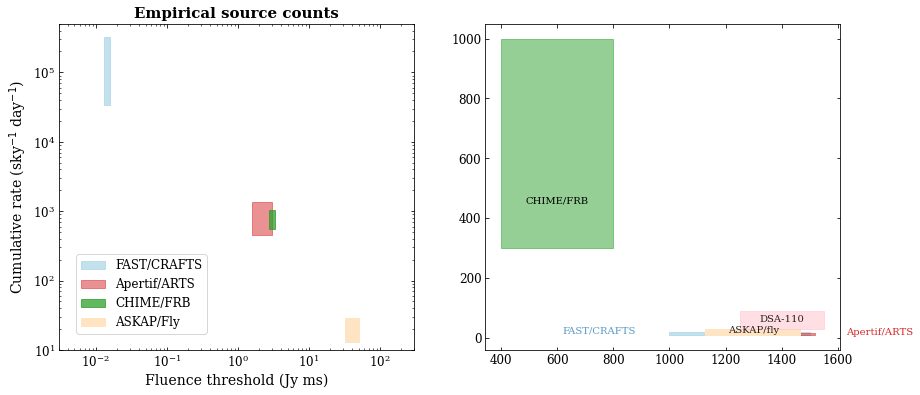

In [45]:


figure(figsize=(14,6))

subplot(121)
F_fast, R_fast, R_fast_low, R_fast_hi = 0.0146, 1.24e5, 1.24e5-0.9e5, 1.24e5+1.94e5
fill_between(np.linspace(F_fast*0.9, F_fast*1.1), R_fast_low, R_fast_hi, alpha=0.75, color='lightblue')

F_apertif, R_apertif, R_apertif_low, R_apertif_hi = 2.0, 750.0, 750-300.0, 750.+600.
fill_between(np.linspace(F_apertif*0.8, F_apertif*1.5), R_apertif_low, R_apertif_hi, alpha=0.5, color='C3')


F_chime, R_chime, R_chime_low, R_chime_hi = 3.0, 820.0, 820.0-260.0, 820.+220.
fill_between(np.linspace(F_chime*0.9, F_chime*1.1), 
             R_chime_low, R_chime_hi, alpha=0.75, color='C2')


F_askap_fly, R_askap_fly, R_askap_fly_low, R_askap_fly_hi = 57.0, 12.7, 12.7-2.2-3.6, 12.7+3.3+3.6
F_askap_fly, R_askap_fly, R_askap_fly_low, R_askap_fly_hi = 40.4, 20.7, 20.7-1.7-5.8, 20.7+2.1+5.8
#F_askap_fly, R_askap_fly, R_askap_fly_low, R_askap_fly_hi = 26., 37, 37-8, 37+8

fill_between(np.linspace(F_askap_fly*0.8, F_askap_fly*1.25), R_askap_fly_low, 
             R_askap_fly_hi, alpha=1, color='bisque', )

Sarr = np.logspace(-3,3,1000)
title('Empirical source counts', fontweight='bold')
legend(['FAST/CRAFTS','Apertif/ARTS','CHIME/FRB','ASKAP/Fly'], 
       loc=(0.05, 0.05), fontsize=12)

xlabel('Fluence threshold (Jy ms)', fontsize=14)
ylabel(r'Cumulative rate (sky$^{-1}$ day$^{-1}$)', fontsize=14)
ylim(1e1,5e5)
xlim(0.003,300)
loglog()

subplot(122)
#CHIME
fill_between(np.linspace(400, 800), 300, 1000, alpha=0.5, color='C2')
text(600, 450, 'CHIME/FRB', ha='center', fontsize=10)

#Fast
fill_between(np.linspace(1000, 1500), 10, 20, alpha=0.75, color='lightblue')
text(750, np.sqrt(10*20), 'FAST/CRAFTS', ha='center', fontsize=10, c='C0', alpha=0.75)

#Apertif
fill_between(np.linspace(1220, 1520), 8, 16, alpha=0.5, color='C3')
text(1750, np.sqrt(8*16), 'Apertif/ARTS', ha='center', fontsize=10, color='C3')

#ASKAP-fly
fill_between(np.linspace(1128, 1464), 10, 30, alpha=1, color='bisque')
text(1300, np.sqrt(10*30), 'ASKAP/fly', ha='center', fontsize=10, c='k', alpha=0.85)

#DSA-110
fill_between(np.linspace(1250, 1550), 30, 90, alpha=0.5, color='pink')
text(1400, np.sqrt(30*90), 'DSA-110', ha='center', fontsize=10, backgroundcolor='None', alpha=0.85)


#CHORD
fill_between(np.linspace(300, 1500), rate_chord_low, rate_chord_hi, 
             alpha=0.75, color='None', edgecolor='k', hatch='//', linestyle=':')
text(500, np.sqrt(rate_chord_low*rate_chord_hi), 'CHORD', ha='center', fontsize=10, backgroundcolor='white')


#DSA-2000
fill_between(np.linspace(700, 2000), rate_dsa_low, rate_dsa_hi, alpha=1, 
             color='lightgrey', edgecolor='k', hatch='\\', linestyle=':')
text(1300, np.sqrt(rate_dsa_low*rate_dsa_hi), 'DSA-2000', color='k', ha='center', fontsize=10, backgroundcolor='lightgrey')


#BRST
fill_between(np.linspace(400, 800), rate_brst_low, rate_brst_hi, alpha=0.35, 
             color='None', edgecolor='k', hatch='++', linestyle=':')
text(600, np.sqrt(rate_brst_low*rate_brst_hi), 'CASM', color='k', ha='center', fontsize=10, backgroundcolor='None')


title('Detection rates', fontweight='bold')
ylabel('FRBs per year')
xlabel('Frequency coverage (MHz)')

semilogy()
#savefig('frb-rates-figure.pdf')

In [ ]:
rate_chord_low, rate_chord_hi

In [ ]:
figure(figsize=(14,6))

subplot(121)
F_fast, R_fast, R_fast_low, R_fast_hi = 0.0146, 1.24e5, 1.24e5-0.9e5, 1.24e5+1.94e5
fill_between(np.linspace(F_fast*0.9, F_fast*1.1), R_fast_low, R_fast_hi, alpha=0.75, color='lightblue')

F_apertif, R_apertif, R_apertif_low, R_apertif_hi = 4.0, 750.0, 750-300.0, 750.+600.
fill_between(np.linspace(F_apertif*0.8, F_apertif*1.5), R_apertif_low, R_apertif_hi, alpha=0.5, color='C3')


F_chime, R_chime, R_chime_low, R_chime_hi = 5.0, 820.0, 820.0-260.0, 820.+220.
fill_between(np.linspace(F_chime*0.9, F_chime*1.1), 
             R_chime_low, R_chime_hi, alpha=0.75, color='C2')


F_askap_fly, R_askap_fly, R_askap_fly_low, R_askap_fly_hi = 57.0, 12.7, 12.7-2.2-3.6, 12.7+3.3+3.6
F_askap_fly, R_askap_fly, R_askap_fly_low, R_askap_fly_hi = 40.4, 20.7, 20.7-1.7-5.8, 20.7+2.1+5.8

fill_between(np.linspace(F_askap_fly*0.8, F_askap_fly*1.25), R_askap_fly_low, 
             R_askap_fly_hi, alpha=1, color='bisque', )

Sarr = np.logspace(-3,3,1000)
#plot(Sarr, R_chime*(Sarr/5.0)**-1.5)
title('Empirical source counts', fontweight='bold')
legend(['FAST/CRAFTS','Apertif/ARTS','CHIME/FRB','ASKAP/Fly'], 
       loc=(0.05, 0.05), fontsize=12)
xlabel('Fluence threshold (Jy ms)', fontsize=14)
ylabel(r'Cumulative rate (sky$^{-1}$ day$^{-1}$)', fontsize=14)
loglog()

subplot(122)
#CHIME
fill_between(np.linspace(400, 800), 300, 1000, alpha=0.5, color='C2')
text(600, 450, 'CHIME/FRB', ha='center', fontsize=10)

#Fast
fill_between(np.linspace(1000, 1500), 10, 20, alpha=0.75, color='lightblue')

#Apertif
fill_between(np.linspace(1220, 1520), 8, 16, alpha=0.5, color='C3')

#ASKAP-fly
fill_between(np.linspace(1128, 1464), 10, 30, alpha=1, color='bisque')

#DSA-110
#fill_between(np.linspace(1250, 1550), 20, 75, alpha=0.5)

#CHORD
#fill_between(np.linspace(300, 1500), 1000, 5000, 
#             alpha=0.75, color='None', edgecolor='k', hatch='//', linestyle=':')
#text(500, 1500, 'CHORD', ha='center', fontsize=10, backgroundcolor='white')


#DSA-2000
fill_between(np.linspace(700, 2000), 800, 3000, alpha=1, 
             color='lightgrey', edgecolor='k', hatch='\\', linestyle=':')
text(1300, 1500, 'DSA-2000', color='k', ha='center', fontsize=10, backgroundcolor='lightgrey')


#BRST
#fill_between(np.linspace(400, 800), 5000, 12000, alpha=0.35, 
#             color='None', edgecolor='k', hatch='++', linestyle=':')
#text(600, 7000, 'BRST', color='k', ha='center', fontsize=10, backgroundcolor='None')


title('Detection rates', fontweight='bold',)
ylabel('FRBs per year')
xlabel('Frequency coverage (MHz)')

semilogy()
savefig('frb-rates-figure-slides.pdf')

In [ ]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [ ]:
cosmo.differential_comoving_volume(zz)

In [ ]:
x2=[]
x=[]
z = np.linspace(0,6,1000)
for ii,zz in enumerate(z):
    if ii%100==0:
        print(ii)
    Nz = 50*(1+zz)**-1 * cosmo.differential_comoving_volume(zz).value / 1e8
    print(Nz)
    x.append(Nz)
for ii,zz in enumerate(z):
    if ii%100==0:
        print(ii)
    Nz = 5*(1+zz)**-1 * (1+zz)**2.5 / (1 + ((1+zz)/2.9)**5.6) *cosmo.differential_comoving_volume(zz).value
    x2.append(Nz)


In [46]:
from astropy import units as u
L = np.random.uniform(0.01,1,10000)**(-1/1.5)* 0.5e36 * u.erg * u.s**-1 * u.Hz**-1
print(L.max())

1.0652359699861877e+37 erg / (Hz s)


In [360]:
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
import astropy.constants as constants
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

Lmax = 0.001
z_arr_casm, S_arr_casm = [], []
gam = 1.5
z = np.linspace(0.1,5,1000)

for ii,zz in enumerate(z):

    Nz = 25 * (1+zz)**-1 * cosmo.differential_comoving_volume(zz).value / 1e8
    Nz = int(Nz)
    L = np.random.uniform(Lmax,1,Nz)**(-1/gam) * 0.5e36 * u.erg * u.s**-1 * u.Hz**-1
    DL = cosmo.luminosity_distance(zz)
    S = L/(4*np.pi*DL**2)
    S = S.to(u.Jy)
    for SS in S:
        if SS.value>150.0:
            z_arr_casm.append(zz)
            S_arr_casm.append(SS)
            
z_arr_dsa, S_arr_dsa = [], []

for ii,zz in enumerate(z):

    Nz = 0.1 * (1+zz)**-1 * cosmo.differential_comoving_volume(zz).value / 1e8
    Nz = int(Nz)
    L = np.random.uniform(Lmax,1,Nz)**(-1/gam)* 0.5e36 * u.erg * u.s**-1 * u.Hz**-1
    DL = cosmo.luminosity_distance(zz)
    S = L/(4*np.pi*DL**2)
    S = S.to(u.Jy)
    for SS in S:
        if SS.value>5.0:
            z_arr_dsa.append(zz)
            S_arr_dsa.append(SS)

z_arr_chord, S_arr_chord = [], []

            
for ii,zz in enumerate(z):

    Nz = 0.5 * (1+zz)**-1 * cosmo.differential_comoving_volume(zz).value / 1e8
    Nz = int(Nz)
    L = np.random.uniform(Lmax,1,Nz)**(-1/gam)* 0.5e36 * u.erg * u.s**-1 * u.Hz**-1
    DL = cosmo.luminosity_distance(zz)
    S = L/(4*np.pi*DL**2)
    S = S.to(u.Jy)
    for SS in S:
        if SS.value>9.0:
            z_arr_chord.append(zz)
            S_arr_chord.append(SS)
            
# tau_ch=[]
# for zz in zch:
#     tau_ch.append(p[np.argmin(abs(zz-zp))])
    
# tau_dsa=[]
# for zz in z_arr_5:
#     tau_dsa.append(p[np.argmin(abs(zz-zp))])
    
# tau_brst=[]
# for zz in z_arr_25:
#     tau_brst.append(p[np.argmin(abs(zz-zp))])
    
# print("Tau BRST",mean(tau_brst))
# print("Tau DSA",mean(tau_dsa))
# print("Tau CHIME",mean(tau_ch))

In [70]:
print(len(z_arr_casm) / len(z_arr_dsa),)
print("CASM mean z",median(z_arr_casm), mean(z_arr_casm))
print("CHORD mean z",median(z_arr_chord), mean(z_arr_chord))
print("DSA mean z",median(z_arr_dsa), mean(z_arr_dsa))

20.930555555555557
CASM mean z 0.3648648648648649 0.4326297523999031
CHORD mean z 0.928928928928929 1.0023446201360313
DSA mean z 1.1202202202202203 1.2005104986783475


In [13]:
def prob(z):
    return 5e-4 * z**3 / (1+0.041*z**1.1)**2.7

wdsa = prob(array(z_arr_dsa))
wchord = prob(array(z_arr_chord[::2]))
wcasm = prob(array(z_arr_casm[::2]))

In [26]:
len(z_arr_chord[::6])
len(z_arr_casm[::8])
len(z_arr_dsa[::3])

11271

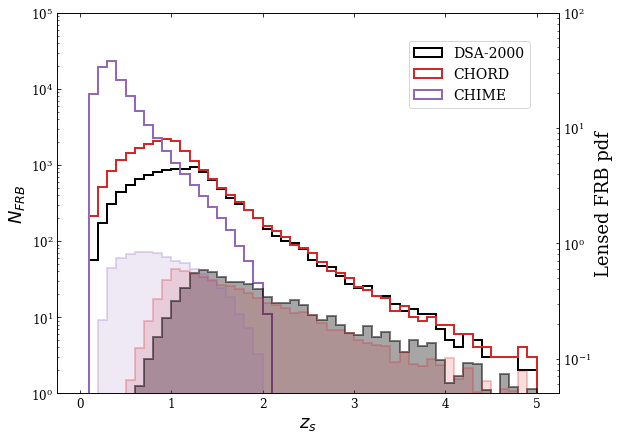

In [29]:
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(111)

ax1.hist(z_arr_dsa[::3], log=True, bins=50, lw=2, range=(0,5), histtype='step', color='k')
ax1.hist(z_arr_chord[::6], log=True, bins=50, lw=2, range=(0,5), histtype='step', color='C3')
ax1.hist(z_arr_casm[::8], log=True, alpha=1, lw=2, bins=50, range=(0,5), histtype='step',color='C4')
ax1.set_ylim(1, 1e5)

ax2 = ax1.twinx()
ax2.hist(z_arr_dsa, log=True, bins=50, lw=2, range=(0,5), 
         alpha=0.35, color='k', weights=wdsa,
         density=True)
ax2.hist(z_arr_chord[::2], log=True, bins=50, lw=2, 
         range=(0,5), alpha=0.15, density=True,
         color='C3', weights=wchord)
ax2.hist(z_arr_casm[::2], log=True, alpha=0.15, 
         lw=2, bins=50, density=True,
         range=(0,5), color='C4',
         weights=wcasm)

ax2.hist(z_arr_dsa, log=True, bins=50, lw=2, range=(0,5), 
         alpha=0.5, color='k', weights=wdsa,histtype='step',
         density=True)
ax2.hist(z_arr_chord[::2], log=True, bins=50, lw=2, 
         range=(0,5), alpha=0.25, density=True, histtype='step',
         color='C3', weights=wchord)
ax2.hist(z_arr_casm[::2], log=True, alpha=0.25, 
         lw=2, bins=50, density=True,
         range=(0,5), color='C4', histtype='step',
         weights=wcasm)
#ax2.legend(['DSA-2000 lensed','CHORD lensed','CASM lensed'])

ax2.set_ylim(5e-2, 100)

ax1.legend(['DSA-2000','CHORD','CHIME',], 
       loc=(0.7,0.75))
#hist(zch, log=True, alpha=0.25, bins=50, range=(0,5), color='C2')
ax1.set_xlabel(r'$z_s$', fontsize=18)
ax1.set_ylabel(r'$N_{FRB}$', fontsize=18)
ax2.set_ylabel('Lensed FRB pdf', fontsize=18)

savefig('zfrb_forecast_DSA.png')

In [47]:
def prob(z):
    return 5e-4 * z**3 / (1+0.041*z**1.1)**2.7

w = prob(array(z_arr_casm[::2]))

hist(z_arr_casm[::2], log=True, alpha=1, lw=2, bins=50, 
     range=(0,5), histtype='step', color='C4', )
yy = hist(z_arr_casm[::2], log=True, alpha=0.25, lw=2, bins=50, 
     range=(0,5), color='C4', weights=w)
ylim(1, 1e5)

NameError: name 'z_arr_casm' is not defined

In [39]:
zch = (-100+dm_ch)/1000.
log=True
z_arr_brst = z_arr_25[:]
z_arr_dsa = z_arr_5[:]
nbrst,zbrst,c=hist(z_arr_brst, bins=15, color='k', range=(0,4))
ndsa,zdsa,c=hist(z_arr_dsa, bins=15, color='C1', range=(0,4))
hist(zch, bins=15, color='C0', log=log, range=(0,4))

NameError: name 'dm_ch' is not defined

In [ ]:
clf()

hist(zch, bins=15, color='C2', log=True, range=(0,4), alpha=0.5)
plot(zbrst[:-1], 1e-1*nbrst,ds='steps', color='k', lw=4)
plot(zdsa[:-1], 1e-3*ndsa,ds='steps', color='C9', lw=4)

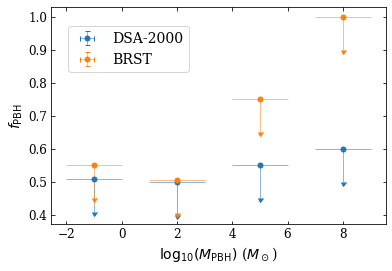

In [95]:
x = [-1,2,5,8]
y = array([0.01, 0.001, 0.05, 0.1])
xerr = 1
yerr = 0.1
uplims = np.array([1,1,1,1], dtype=bool)

errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims,
            linestyle='', marker='o')

errorbar(x, 5*y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims,
            linestyle='', marker='o')

ylabel(r'$f_{\rm PBH}$')
xlabel(r'$\log_{10}(M_{\rm PBH})$ ($M_\odot$)')
legend(['DSA-2000','BRST'], loc=(0.05, 0.7))

In [212]:
def f(zs):
    return (5e-4*zs**3) / (1+0.41*zs**1.1)**2.7

tt=0
for zz in zch:
    zz = max(0, zz)
    if np.isnan(zz):
        continue
    tt += f(zz)
    
print(tt*3 * 16500/500.*4*4)

60.01894361457351


In [189]:
f(2.0)/f(1.2), f(2.0)/f(0.5), f(2.0)/f(1.0),

(2.525246540959166, 18.702425038721287, 3.6852779680613343)

In [24]:
4400/862.5 * 0.35 * 4

7.142028985507245

# Results Table 2

## PBH constraints

## IMBH lensing rates, assuming Paynter

In [29]:
surv_name = ['DSA', 'CHORD', 'CASM', 'CHIME']

z_dsa_mean, z_chord_mean, z_casm_mean, z_ch_mean = 1.2, 1.0, 0.5, 0.5
z_survey_mean = [z_dsa_mean,z_chord_mean,z_casm_mean,z_ch_mean]

rate_dsa, rate_chord, rate_casm, rate_ch = (800,4400),(1000,6000),(12500,25000),(500,1000)

rate_survey = [rate_dsa, rate_chord, rate_casm, rate_ch]

N_paynter = np.array([2700 / ((4.6-3.3)/4.6), 2700 / ((4.6+9.8)/4.6)])

for ii, z_mean in enumerate(z_survey_mean):
    penalty = (z_mean/2.0)**2
    a = rate_survey[ii][0] / N_paynter.max() * 4 * penalty
    b = rate_survey[ii][1] / N_paynter.min() * 4 * penalty
    print('%s: %0.1f--%0.1f events per 5 years'%(surv_name[ii], a, b))

DSA: 0.1--7.3 events per 5 years
CHORD: 0.1--7.0 events per 5 years
CASM: 0.3--7.2 events per 5 years
CHIME: 0.0--0.3 events per 5 years


## Strong lensing by massive galaxies 

In [83]:
def prob(z):
    return 5e-4 * z**3 / (1+0.041*z**1.1)**2.7

gamma_ch = 2.
B = 2**gamma_ch / (3-gamma_ch)
tau_total = 0

for zz in z_ch:
    if zz<0:
        continue
    tau_total += Y[1][np.argmin(np.abs(zarr-zz))]
    
print(tau_total * 50000.0 / float(len(z_ch)), tau_total * 100000.0 / float(len(z_ch)) * B)
print(tau_total/float(len(z_ch))*(1.2/0.5)**2*4400*4)

4.883090680665898 39.064725445327184
9.90056401686372
